- Response(dependent variable, Y variable, target, outcome): variable que tratamos de predecir.
- Independent variable(X variable, feature, attribute, predictor): La variable que usamos para predecir la respuesta
- Record(row, case, instance, example): El vector de variables predictoras y los valores de salida de un individuo especifico o caso
- Intercept(b0): La interseccioón de la línea de regresión, es decir, el valor pronosticado cuando X=0
- regression coefficient(slope,b1, weights, parameter stimates ): La pendiente de la línea de regresión.
- Fitted values (predicted values): Los estimados obtenidos de la línea de regresión
- Residuals (errors, prediction errors): La diferencia entre los valores observados y los valores ajustados(fitted values)
- Least squares(Mínimos cuadrados): El método de ajustar una regresión minimizando la suma de los residuos al cuadrado.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np

In [41]:
# Leer una archivo ".csv" con la librería "pandas"

data = pd.read_csv("./Data.csv")

data

,PEFR,Exposure
0,390,0
1,410,0
2,430,0
3,460,0
4,420,1
...,...,...
117,450,22
118,490,22
119,500,22
120,370,23


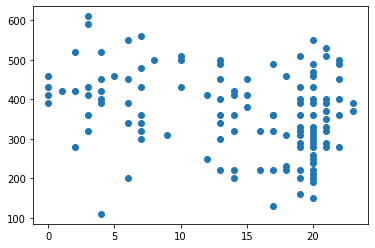

In [42]:
# Realizar un gráfica de dispersión con la librería "matplotlib"

plt.scatter(data.Exposure,data.PEFR)

In [43]:
# Crear un modelo de regresión lineal con la librería "sklearn"

model = linear_model.LinearRegression()

# Entrenar el modelo
# model.fit(data_A, data_B)

model.fit(data[['Exposure']],data['PEFR'])

LinearRegression()

In [44]:
data[['Exposure']]

,Exposure
0,0
1,0
2,0
3,0
4,1
...,...
117,22
118,22
119,22
120,23


In [45]:
print("Intercept: ",model.intercept_)
print("Coefficient: ",model.coef_[0])

Intercept:  424.582806573957
Coefficient:  -4.1845764854614425


In [46]:
model.coef_

array([-4.18457649])

In [47]:
X = [i for i in range(26)]
X = np.array(X)
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [48]:
intercept = model.intercept_
coef = model.coef_[0]

# UFuncs de numpy

Y = intercept + coef*X
Y

array([424.58280657, 420.39823009, 416.2136536 , 412.02907712,
       407.84450063, 403.65992415, 399.47534766, 395.29077118,
       391.10619469, 386.9216182 , 382.73704172, 378.55246523,
       374.36788875, 370.18331226, 365.99873578, 361.81415929,
       357.62958281, 353.44500632, 349.26042984, 345.07585335,
       340.89127686, 336.70670038, 332.52212389, 328.33754741,
       324.15297092, 319.96839444])

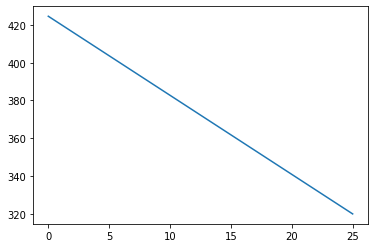

In [49]:
plt.plot(Y)

In [50]:
# Feature vector

x = data['Exposure']

# Response vector

y = data['PEFR']

In [51]:
x

0       0
1       0
2       0
3       0
4       1
       ..
117    22
118    22
119    22
120    23
121    23
Name: Exposure, Length: 122, dtype: int64

In [52]:
y

0      390
1      410
2      430
3      460
4      420
      ... 
117    450
118    490
119    500
120    370
121    390
Name: PEFR, Length: 122, dtype: int64

In [53]:
def calculate_regression_coef(x,y):

    mean_x = np.mean(x)
    mean_y = np.mean(y)

    SSxy = np.sum((mean_x - x) * (mean_y - y))

    SSxx = np.sum((mean_x - x)*(mean_x - x))

    b1 = SSxy/SSxx
    b0 = mean_y - (b1 * mean_x)

    return (b0,b1)

In [54]:
b0,b1 = calculate_regression_coef(x,y)

In [55]:
print(b0)
print(b1)

424.582806573957
-4.18457648546144


In [56]:
# Predecir datos

fitted = model.predict(data[['Exposure']])

fitted

array([424.58280657, 424.58280657, 424.58280657, 424.58280657,
       420.39823009, 416.2136536 , 416.2136536 , 416.2136536 ,
       412.02907712, 412.02907712, 412.02907712, 412.02907712,
       412.02907712, 412.02907712, 407.84450063, 407.84450063,
       407.84450063, 407.84450063, 407.84450063, 407.84450063,
       403.65992415, 399.47534766, 399.47534766, 399.47534766,
       399.47534766, 399.47534766, 395.29077118, 395.29077118,
       395.29077118, 395.29077118, 395.29077118, 395.29077118,
       395.29077118, 391.10619469, 386.9216182 , 382.73704172,
       382.73704172, 382.73704172, 374.36788875, 374.36788875,
       370.18331226, 370.18331226, 370.18331226, 370.18331226,
       370.18331226, 370.18331226, 370.18331226, 370.18331226,
       365.99873578, 365.99873578, 365.99873578, 365.99873578,
       365.99873578, 365.99873578, 361.81415929, 361.81415929,
       361.81415929, 357.62958281, 357.62958281, 353.44500632,
       353.44500632, 353.44500632, 353.44500632, 353.44

In [57]:
residuals = data['PEFR'] - fitted

residuals

0      -34.582807
1      -14.582807
2        5.417193
3       35.417193
4       -0.398230
          ...    
117    117.477876
118    157.477876
119    167.477876
120     41.662453
121     61.662453
Name: PEFR, Length: 122, dtype: float64

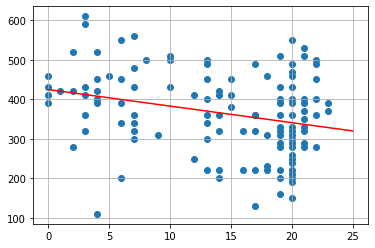

In [58]:
fig = plt.figure()
plt.scatter(data.Exposure,data.PEFR)
plt.plot(Y,color="red")
plt.grid(True)
plt.show()